# Now let's look at this data with Data Science Route  Analysis and Visualiztion

### Details:
    * We use the TSP route generated from the previous lab for our points and route network visualization
    * Geopandas geodataframes and import Geopandas in-library polygon of NYC
    * A background image pulled from OpenStreetMaps website 
    * Each graphic is diplayed with a Title, Axes titles, and a Legend.



In [2]:
import json
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


/Users/RoscoeBColtrane/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## NOW THAT WE HAVE THE DISTANCE COLUMN WE CAN TEST OUT THE TRAVELING SALESMAN PROBLEM FOR BEST PATH !!!


# BEGIN THE VIZ:
### READ IN THE SHAPEFILE - NOTE TO MAINTAIN THE GEODATAFRAME YOU MUST ALWAYS SAVE IT IN A GEO FORMAT LIKE A SHAPEFILE.  SUPER EASY

In [7]:
from shapely.geometry import Point

TSP = gpd.read_file("../shapefiles/pizzaTSPgeopandas17.shp")
TSP2 = gpd.read_file("../shapefiles/pizzaTSPgeopandas17-2.shp")

In [8]:
# TRANSFORM THE COORDS TO THE CRS SET ABOVE   # WGS84 is 4326   # Mercator is 3857
# Set up geodataframe, initially with CRS = WGS84 (since that matches the long and lat co-ordinates)
TSP.crs = {'init': 'epsg:4326'}
TSP2.crs = {'init': 'epsg:4326'}


## Use this code to display the directional arrows in 2D. 
### The points can be any sort of plotting. Though these here are Lat/Long coords, any plot matrix works becasue we are not displaying overlay on a map.

## ANNOTATE FROM PYPLOT PLACES AN ARROW
Plotting the arrows was very difficult, but it finally worked!
### https://matplotlib.org/3.1.0/tutorials/text/text_intro.html

#### This post is bomb! Thanks to user Nico_H     https://stackoverflow.com/questions/58342419/show-direction-arrows-in-a-scatterplot?noredirect=1&lq=1

### This first example visualize Google's API for the TSP algorithm. METHOD 2 from the previous lab

In [57]:
# USE A FUNCTION!!
# Plot with no basemap AND IN MERCATOR PROJECTION BC OF THE CONTEXTILY TILE UNDERNEATH 
# -- added this bsema tile part just for fun.  can remove if you want

def plot_in_space(df, BB,s=40, alpha=0.2):
    x = df['Longitude']
    y = df['Latitude']
    # calculate position and direction vectors:
    x0 = x.iloc[range(len(x)-1)].values
    x1 = x.iloc[range(1,len(x))].values
    y0 = y.iloc[range(len(y)-1)].values
    y1 = y.iloc[range(1,len(y))].values
    xpos = (x0+x1)/2
    ypos = (y0+y1)/2
    xdir = x1-x0
    ydir = y1-y0
    # plot map
    fig, ax = plt.subplots(figsize=(20,20))
    ax.scatter(x,y, marker='o',c='fuchsia',s=100,label=df["Name"]);
    ax.set_title('Pizza Locations and Route Directions', fontsize=15)
    ax.plot(x,y,linewidth=3,c='blue')
    plt.rcParams['axes.facecolor'] = 'black'   # OR USE FIGURE.FACECOLOR IF YOU WANT SHOW AXIS OFF
    #ax.set_axis_off()
    plt.legend(title='Pizza Joints', frameon=True,fontsize=15,title_fontsize=18, fancybox=True,facecolor='white', framealpha=1,edgecolor = 'k')

    # plot arrow on each line:
    for X,Y,dX,dY in zip(xpos, ypos, xdir, ydir):
        ax.annotate("", xytext=(X,Y),xy=(X+0.001*dX,Y+0.001*dY), 
        arrowprops=dict(arrowstyle='fancy',color='lime'), size = 40)

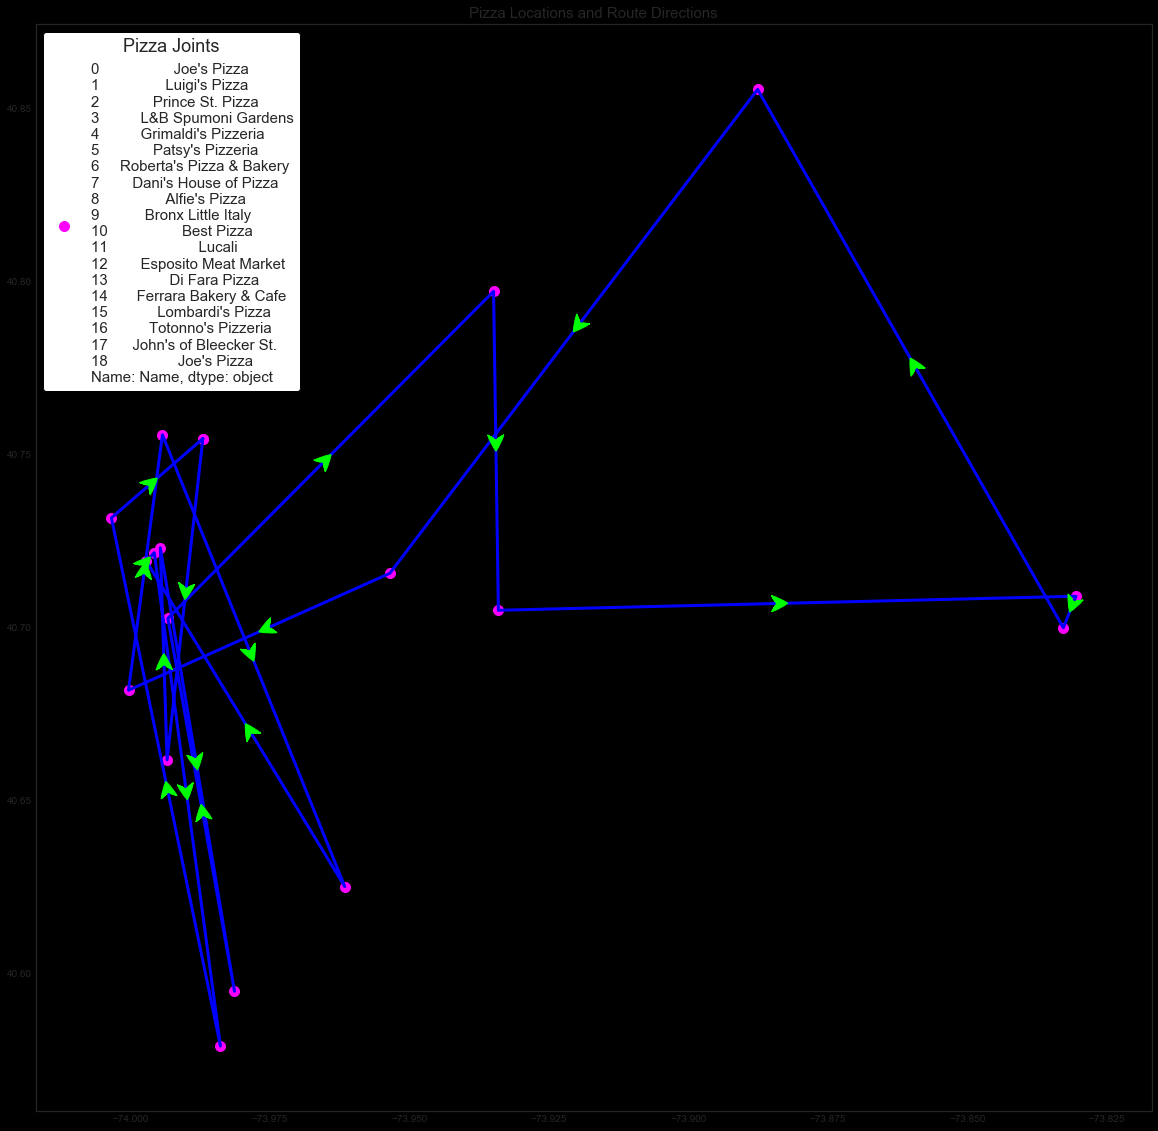

In [58]:
BB_zoom = (-74.3, -73.7, 40.5, 40.9)

plot_in_space(TSP4, BB_zoom, s=20, alpha=0.3)

### Wow that does not look like an efficient path to eat pizza...unless you want to burn tons of calories!

### The next example visualizes The TSP_solver2 library's output, our METHOD 1 from the previous lab

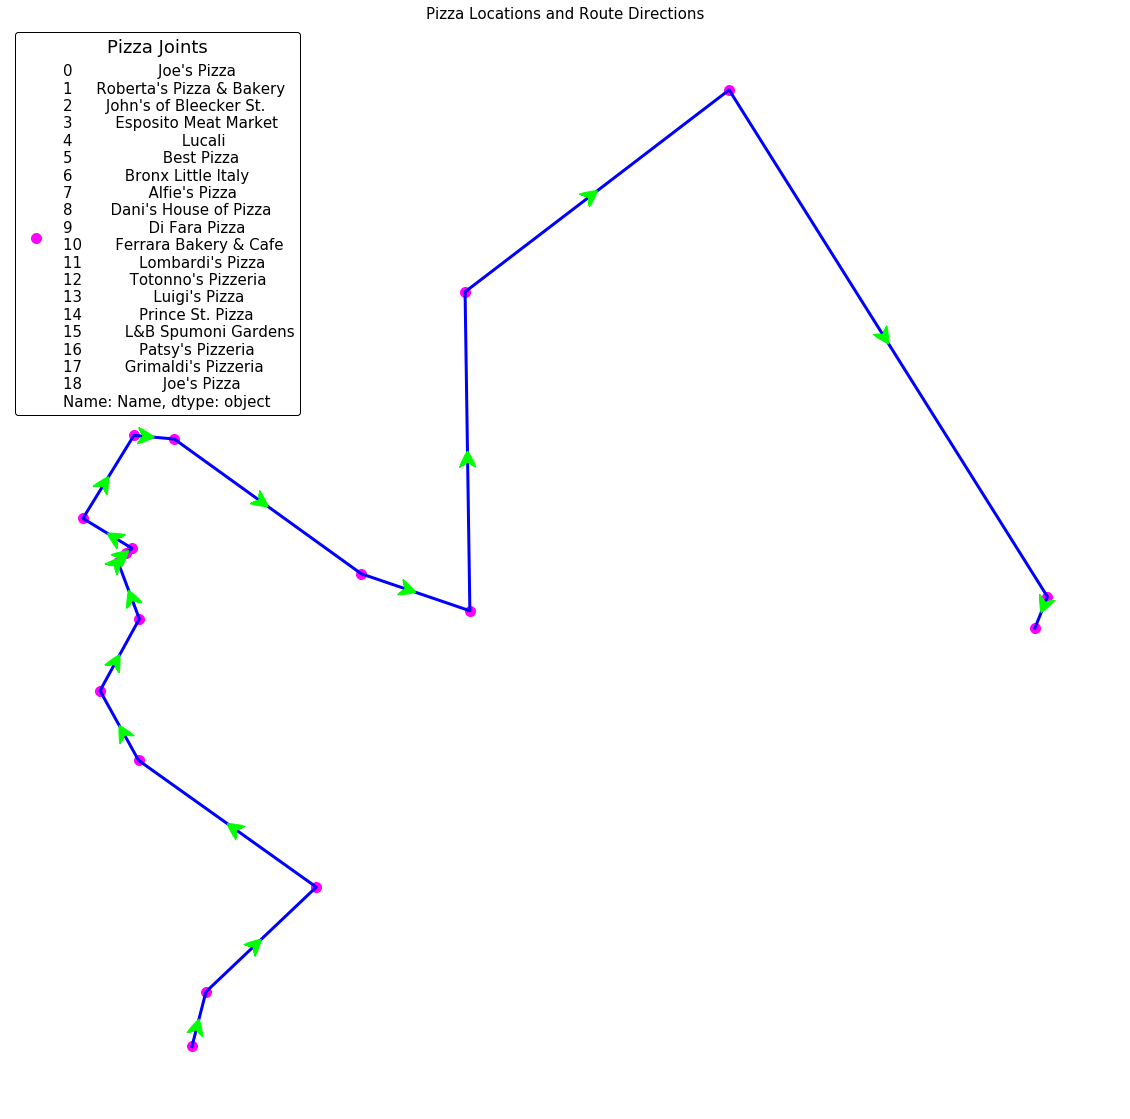

In [13]:
#PLOTTED WITH WGS PROJECTION
# Plot with no basemap an only back color fill
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
x = TSP2['Longitude']
y = TSP2['Latitude']
# calculate position and direction vectors:
x0 = x.iloc[range(len(x)-1)].values
x1 = x.iloc[range(1,len(x))].values
y0 = y.iloc[range(len(y)-1)].values
y1 = y.iloc[range(1,len(y))].values
xpos = (x0+x1)/2
ypos = (y0+y1)/2
xdir = x1-x0
ydir = y1-y0
# plot map
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(x,y, marker='o',c='fuchsia',s=100,label=TSP["Name"]);
ax.set_title('Pizza Locations and Route Directions', fontsize=15)
ax.plot(x,y,linewidth=3,c='blue')
plt.legend(title='Pizza Joints', fontsize=15,title_fontsize=18, 
           fancybox=True,facecolor='white', framealpha=1,edgecolor = 'k')
#plt.rcParams['axes.facecolor'] = 'black'    #TO COLOR BACKGROUND, AXES MUST BE TURNED ON
plt.rcParams['figure.facecolor'] = 'black'   # OR USE FIGURE.FACECOLOR IF YOU WANT SHOW AXIS OFF
ax.set_axis_off()
# plot arrow on each line:
for X,Y,dX,dY in zip(xpos, ypos, xdir, ydir):
    ax.annotate("", xytext=(X,Y),xy=(X+0.001*dX,Y+0.001*dY), 
    arrowprops=dict(arrowstyle='fancy',color='lime'), size = 40)
    #alternate method
    #arrowprops=dict(arrowstyle="->",color='lime'), size = 40)

#plt.savefig('../data/Space_Route.png',bbox_inches='tight');



# Second, let's plot this route over a NYC boro polygon

### We aslso add numbers on the points using "df.apply" and "ax.annotate"which increases the utility of this graphic by matching the points to the legend in order of Route direction

In [14]:
#  read in NYC and boroughs
dfNY = gpd.read_file(gpd.datasets.get_path('nybb'))

# Exclude Staten Island for now
dfNY = dfNY[dfNY['BoroName'].isin(['Staten Island']) == False]
dfNY['geometry']
dfNY = dfNY.to_crs("EPSG:4326")
dfNY.crs

/Users/RoscoeBColtrane/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


'EPSG:4326'

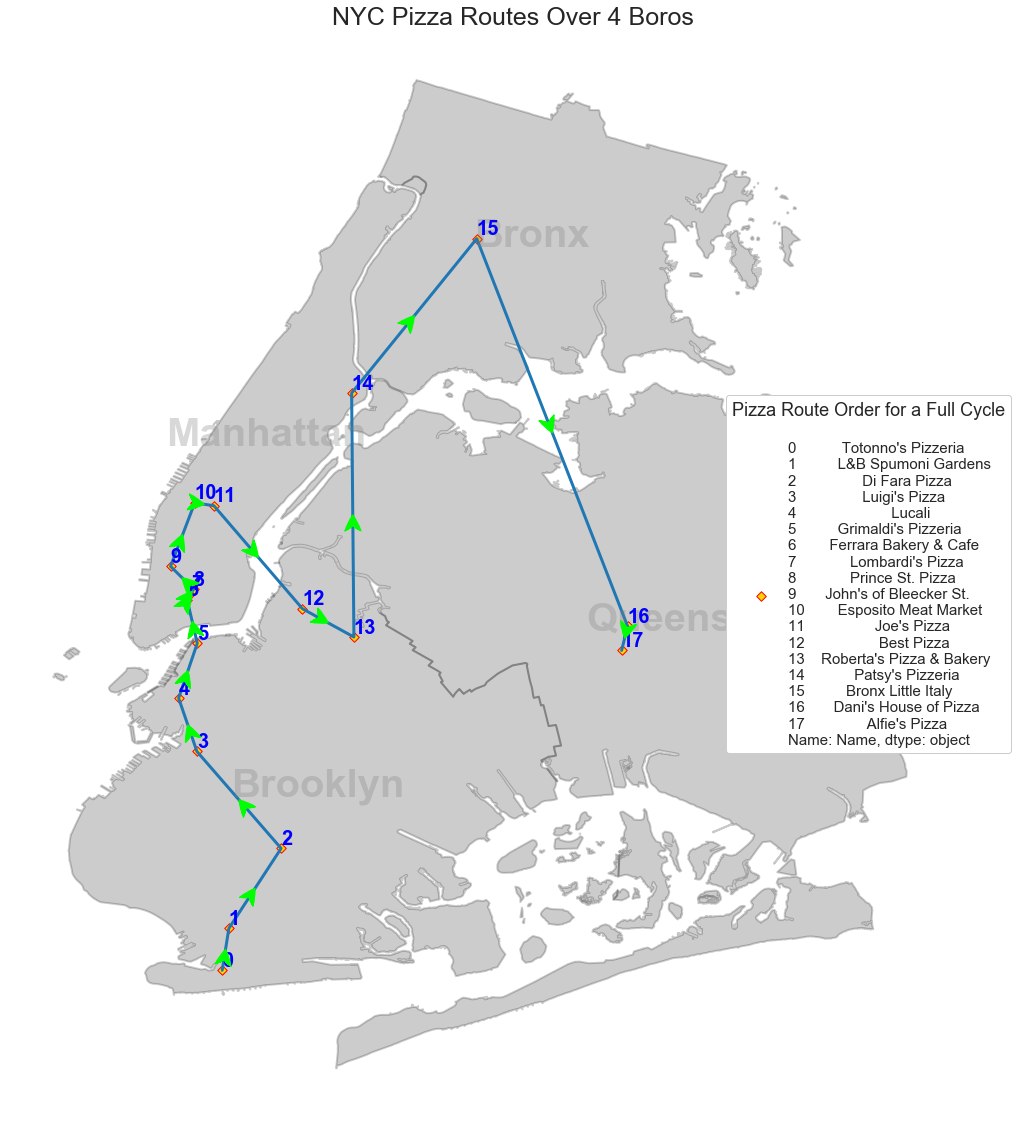

In [16]:
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(20,20))
base = dfNY.plot(ax=ax, alpha=.2, edgecolor='k', facecolor = 'black',linewidth=2)
dfNY.apply(lambda x: ax.annotate(s=x.BoroName, xy=x.geometry.centroid.coords[0], size=40,c='gray',alpha=0.3,ha='center', weight='bold'),axis=1)
TSP2.plot(ax=ax, marker="D", markersize=45,  edgecolor='red',color='gold', label=TSP2['Name'])

#### ANNOTATE adds the numbers on the points
TSP2.apply(lambda x: ax.annotate(s=x.ID, xy=x.geometry.centroid.coords[0],size=20,ha='left',va="bottom",c='blue',weight='bold',alpha=1),axis=1)

ax.set_title("NYC Pizza Routes Over 4 Boros", fontsize=25)
#ax.set_axis_off()
x = TSP2['Longitude']
y = TSP2['Latitude']
# calculate position and direction vectors:
x0 = x.iloc[range(len(x)-1)].values
x1 = x.iloc[range(1,len(x))].values
y0 = y.iloc[range(len(y)-1)].values
y1 = y.iloc[range(1,len(y))].values
xpos = (x0+x1)/2
ypos = (y0+y1)/2
xdir = x1-x0
ydir = y1-y0

ax.plot(x,y,linewidth=3)
ax.legend(loc="center right",title='Pizza Route Order for a Full Cycle', labelspacing=1.5,
           frameon=True,facecolor='white', fancybox=True,framealpha=1,fontsize=15,title_fontsize=18)
# plot arrow on each line:
for X,Y,dX,dY in zip(xpos, ypos, xdir, ydir):
    ax.annotate("", xytext=(X,Y),xy=(X+0.001*dX,Y+0.001*dY), 
    arrowprops=dict(arrowstyle='fancy',color='lime'), size = 40)

plt.savefig('../data/Pizza_labels_Boros2.png',dpi=1000)#,bbox_inches='tight');


# Next is to plot the route as an overlay on a map. This is a georectified image for the basemap

### THANKS TO https://www.kaggle.com/breemen/nyc-taxi-fare-data-exploration



In [19]:
nyc_map_loc = plt.imread('../data/nyc_-74.3_-73.7_40.5_40.9.png')

In [34]:
def plot_on_map(df, BB, nyc_map, s=40, alpha=0.2):
    x = df['Longitude']
    y = df['Latitude']
    # calculate position and direction vectors:
    x0 = x.iloc[range(len(x)-1)].values
    x1 = x.iloc[range(1,len(x))].values
    y0 = y.iloc[range(len(y)-1)].values
    y1 = y.iloc[range(1,len(y))].values
    xpos = (x0+x1)/2
    ypos = (y0+y1)/2
    xdir = x1-x0
    ydir = y1-y0
    # plot map
    fig, ax = plt.subplots(figsize=(20,20))
    ax.scatter(x,y, marker='H',c='fuchsia',s=80,label=df["Name"])
    ax.set_xlim((BB[0], BB[1]))
    ax.set_ylim((BB[2], BB[3]))
    ax.set_title('Pizza Locations and Route Directions', fontsize=25)
    ax.set_xlabel('Longitude',fontsize=20)
    ax.set_ylabel('Latitude',fontsize=20)
    ax.imshow(nyc_map, zorder=0, extent=BB)
    ax.plot(x,y,linewidth=3)
    ax.legend(loc="center left",title='Pizza Route Order for a Full Cycle', labelspacing=1.5,
           frameon=True,facecolor='white', fancybox=True,framealpha=1,fontsize=15,title_fontsize=18)    
    # plot arrow on each line:
    for X,Y,dX,dY in zip(xpos, ypos, xdir, ydir):
        ax.annotate("", xytext=(X,Y),xy=(X+0.001*dX,Y+0.001*dY), 
        arrowprops=dict(arrowstyle='fancy',color='lime'), size = 40)
    plt.savefig('Pizza_Route2.png',bbox_inches='tight');


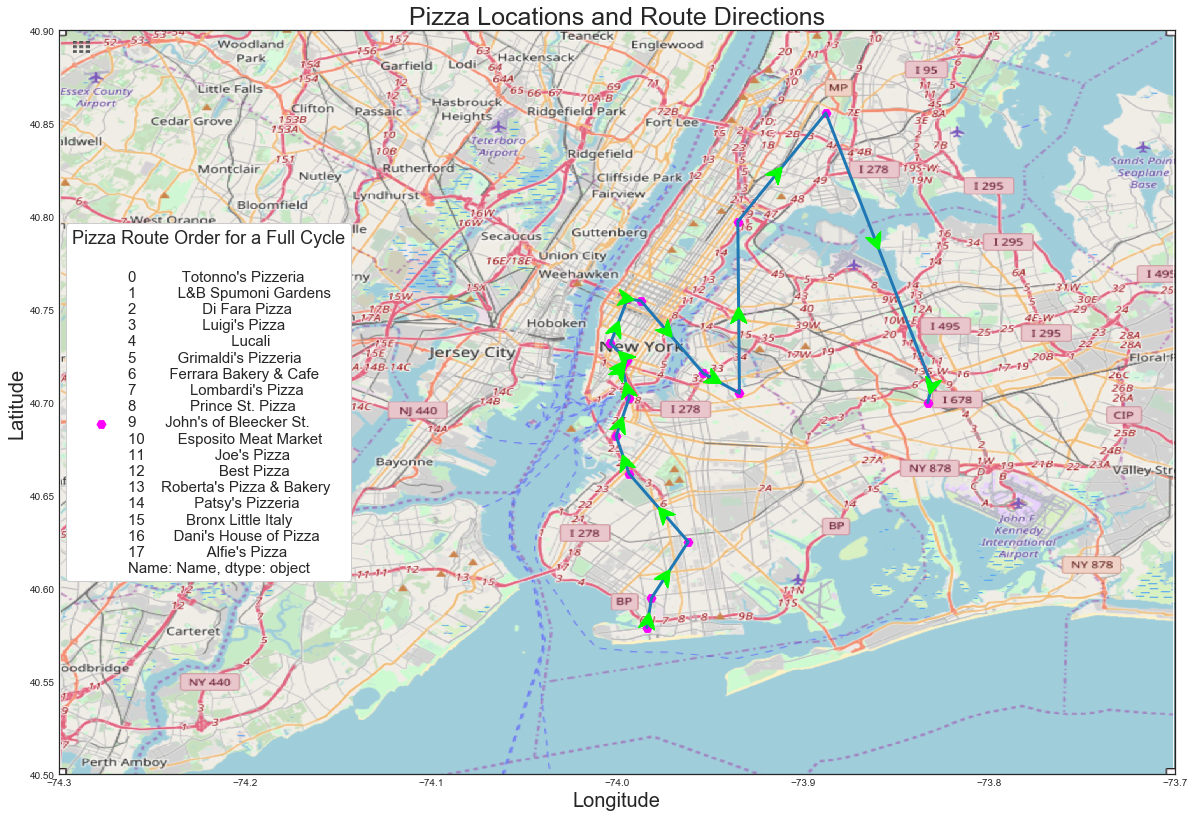

In [35]:
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
plot_on_map(TSP2, BB_zoom, nyc_map_loc, s=20, alpha=0.3)